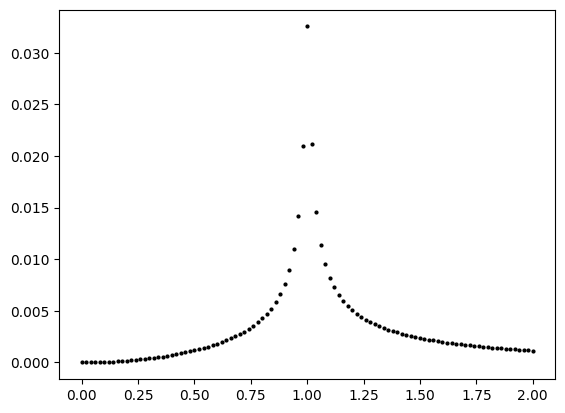

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math 
import cmath

N = 169
H = np.zeros((N,N), dtype = complex)
J_R = 1
J_L = 0.5

#Initialising variables
num = 0.0
den = 0.5*N*(N-1)
eigval = []
eigvec_array = []

for V in np.linspace(0, 2, 101, endpoint = 'True'):

    #Initialising variables
    num = 0.0
    den = 0.5*N*(N-1)

    #Generating Hamiltonian
    for i in range (0, N-1):
        H[i,i+1] = J_L #J_L
        H[i+1,i] = J_R #J_R

    #Periodic Boundary Conditions
    H[N-1][0] = J_L
    H[0][N-1] = J_R

    for n in range (0, N):
        exp_term = -2*math.pi*math.sqrt(2)*(n+1)
        V_n = complex(V*math.cos(exp_term), V*math.sin(exp_term))
        #V_n = V*math.cos(exp_term) + (V*math.sin(exp_term))j
        H[n][n] = V_n

    #Calculating eigenvalues and eigenvectors
    eigval, eigvec_array = np.linalg.eig(H)
    eigvec = np.transpose(eigvec_array)

    #Calculating eta
    for m in range (1,N):
        for n in range (0,m):
            num = num + (abs(np.inner(np.conj(eigvec[n]),eigvec[m]))**2)       
    eta = num/den

    #Plotting eta
    plt.plot(V, eta, 'o', markersize = '2', color = 'black')

plt.show()